In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
PATH = "/Users/abdoul_aziz_berrada/Documents/M2_MOSEF/2_Projets/Semestre1/Linux_HMEQ/Modifs/2_Data/"
data = pd.read_csv(PATH + "hmeq.csv")
data.dtypes.value_counts()

float64    9
int64      2
object     2
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


On a 13 variables réparties comme suit : 11 variables numériques dont 9 continues et 2 entières et 2 variables qualitatives

In [13]:
data.dtypes.value_counts().plot.pie()
#plt.show()

<AxesSubplot:ylabel='None'>

### Analyse univariate

In [11]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Voici quelsques statistiques descriptives des variables numériques notre dataset :

On voit que :

- Pour la variable **LOAN**, on a une moyenne de 18607$ par montant demandé et 75% des prêts demandés sont 23300$; 
- Pour **DEBTINC** les valeurs varient entre 0.52% et 203.31% avec 50% des taux d'endettemnt supérieurs à 34.8%;
- Pour **VALUE** qui représente la valeur du bien actuel de l'emprunteur, on voit que les sont très dispérsées autour de la moyenne, l'écart type est très élevée et les biens valent en moyenne 101776$.

In [30]:
print(data['BAD'].value_counts())
print(data['BAD'].value_counts(normalize = True))

0    4771
1    1189
Name: BAD, dtype: int64
0    0.800503
1    0.199497
Name: BAD, dtype: float64


<AxesSubplot:xlabel='BAD', ylabel='count'>

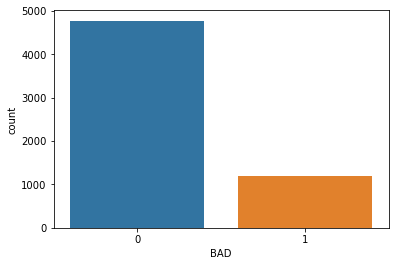

In [95]:
sns.countplot(x='BAD', data = data)

La cible **BAD** est une variable binaire indiquant si le client a payé son prêt ou s’il est en défaut de paiement. Cette issue défavorable s’est produite dans 1 189 cas (20 %).

In [32]:
for col in data.select_dtypes('float'):
    sns.distplot(data[col])

Une distribution désaxée vers la droite; une moyenne donc supérieure à la médiane distingue toutes les variables quantitatives de **DEBTINC**.
La médiane est une meilleure mesure de tendance centrale lorsque les distributions sont désaxées. 

Toutes  les variables quantitatives ont un écart à la moyenne faible donc elles sont bien centrées sauf pour **LOAN, MORTDUE, VALUE** qui ont un écart type important.

In [31]:
print(data['REASON'].value_counts())
print(data['REASON'].value_counts(normalize = True))

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64


In [34]:
print(data['JOB'].value_counts())
print(data['JOB'].value_counts(normalize = True))

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64


Concernant les 2 seules variables qualitatives, on voit que **REASON** qui indique le motif de demande du prêt a 2 modalités et la plus fréquente est ***DebtCon*** (Consolidation de dettes) à hauteur de 68.8% des cas et l'autre motif de prêt est ***HomeImp***. Les demandeurs de prêts font rouler leurs prêts, ils s'endettent de nouveau pour payer leurs anciens prêts. La variable **JOB** , elle distingue 6 types de demandeurs de prêts,  dans l'ordre d'importance on a : ***Other, ProfExe, Office, Mgr, Self et Sales***.

### Analyse multivariate

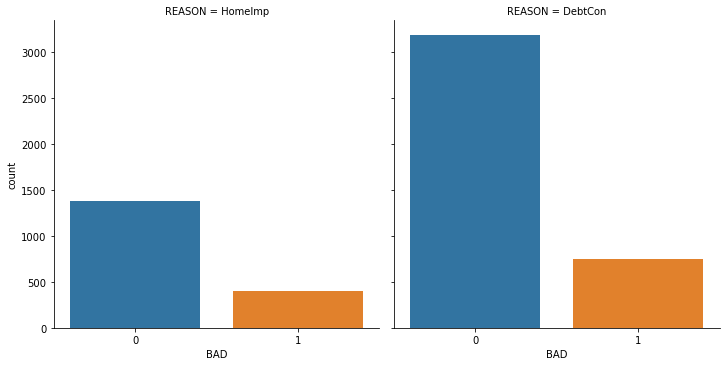

In [96]:
sns.catplot(x='BAD', col = 'REASON',kind='count', data=data)

On voit que parmi les emprunteurs, ceux qui demandent un nouveau prêt pour consolider l'ancien sont généralement ceux qui font le plus défaut.

<Figure size 1440x864 with 0 Axes>

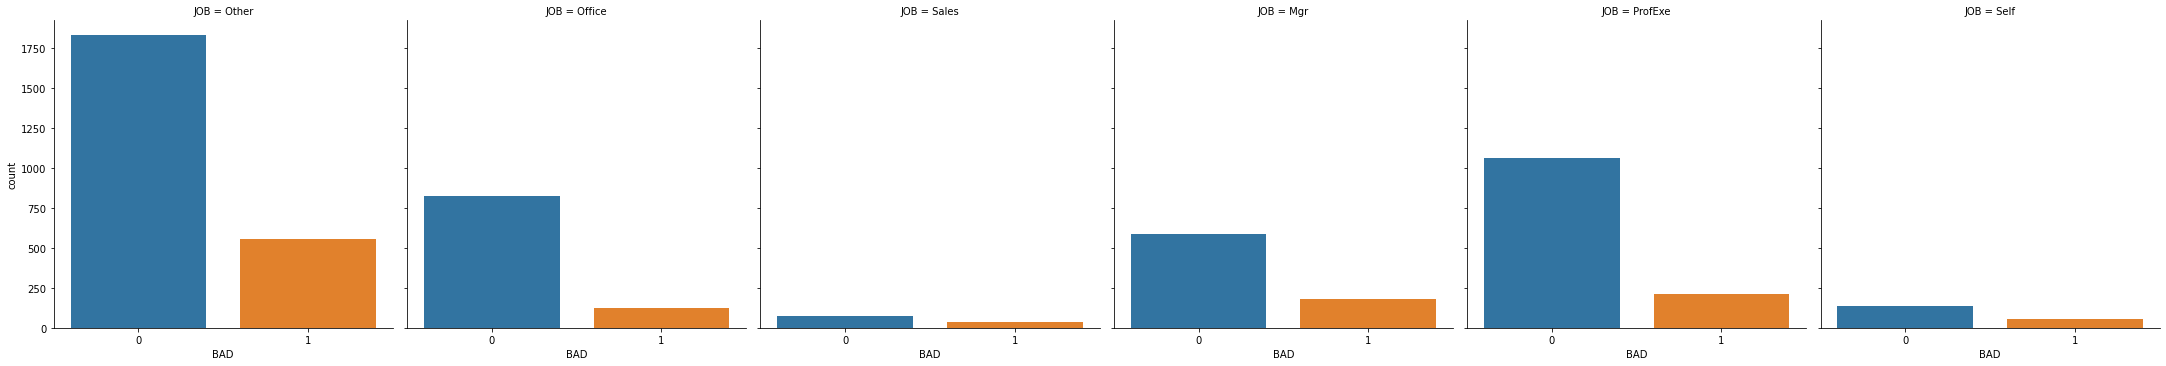

In [97]:
plt.figure(figsize = (20, 12))
sns.catplot(x='BAD', col = 'JOB',kind='count', data=data)

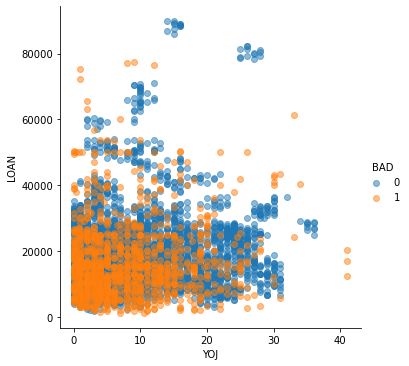

In [98]:
sns.lmplot(x='YOJ', y='LOAN', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5})

<Figure size 432x288 with 0 Axes>

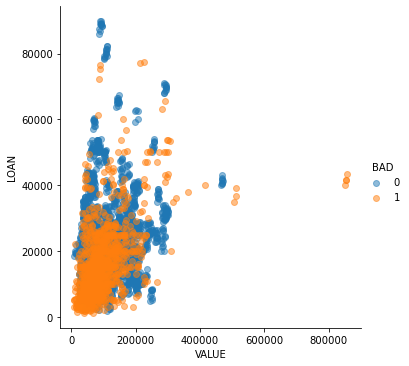

In [99]:
plt.figure()
sns.lmplot(x='VALUE', y='LOAN', hue='BAD', data=data, fit_reg=False, scatter_kws={'alpha':0.5})
plt.show()

On remarque que les montants prêtés augmentent au fur et à  mesure que le nombre d'année d'ancienneté augmente et d'autres part avec la hausse de la valeur du bien. La valeur du prêt est positivement corrélée à l'expérience professionnelle et à la valeur du logement. On remarquera aussi que les prêts en défaut sont majoritairement ceux des clients les moins expérimentés (- de 20 ans d'ancienneté) et des individus avec un montant d'hypothèque inférieur à 200000$ avec des prêts inférieurs à 40000$

<AxesSubplot:>

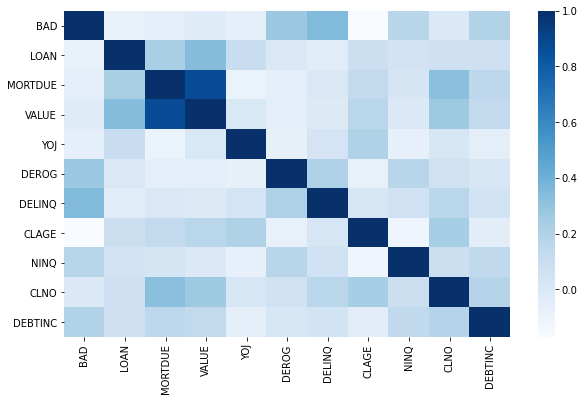

In [101]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), cmap="Blues")

Le corrélogramme ci-dessous nous montre qu'il y a une  corrélation entre MORTDUE et VALUE ce qui est logique étant donné que la première variable dénote le montant dû sur l’hypothèque existante et VALUE la valeur actuelle de ce même bien. En revanche, les autres variables sont très faiblement corrélées ce qui est un bon indicateur pour avoir des coefficients de régression significatifs en absence de corrélations entre les variables explicatives.